<a href="https://colab.research.google.com/github/seohyeon1578/TensorFlow/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# 분류(Classification)

잔차의 제곱의 합(SSE), 잔차의 제곱의 평균(MSE)

## 이항 분류(Binary Classification)

In [ ]:
# 와인 데이터셋 불러오기
import pandas as pd                                    #pandas: 데이터 정제 및 분석을 위한 라이브러리
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')       #레드 와인
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')   #화이트 와인
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
# 와인 데이터셋 합치기
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white]) #레드와인 화이트 와인 데이터셋 합치기
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

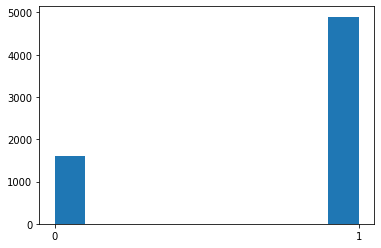

1    4898
0    1599
Name: type, dtype: int64


In [ ]:
# 레드 와인과 화이트 와인 type 히스토그램
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

print(wine['type'].value_counts())

In [ ]:
# 데이터 요약 정보 확인
print(wine.info())       # 데이터의 파악을 도와주는 함수

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


출력된 13개의 속성 모두 non-null로 표시되어 null인 값은 하나도 들어있지 않다. 또한 11개는 float64, 2개는 int64로 모두 숫자 값이기 떄문에 안전하게 정규화 가능

In [ ]:
# 데이터 정규화
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

In [ ]:
# 데이터 섞은 후 numpy array로 변환
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)               #frac=1 은 100%로 모든 데이터를 뽑아서 섞는 것과 동일한 효과
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()                     #to_numpy(): 데이터프레임을 넘파이 array로 변환
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
110        0.223140          0.060000     0.325301        0.121166   0.121262   
2345       0.355372          0.106667     0.156627        0.159509   0.056478   
204        0.165289          0.133333     0.210843        0.026074   0.073090   
4302       0.272727          0.206667     0.234940        0.161043   0.041528   
633        0.520661          0.570000     0.132530        0.042945   0.159468   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
110              0.218750              0.361751  0.169462  0.131783   
2345             0.138889              0.472350  0.186042  0.302326   
204              0.121528              0.248848  0.101986  0.434109   
4302             0.083333              0.456221  0.174475  0.255814   
633              0.034722              0.184332  0.267785  0.550388   

      sulphates   alcohol   quality  type  
110    0.095506  0.115942  0.500000   1.0 

In [ ]:
# train 데이터와 test 데이터로 분리
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx,:-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:,-1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])    #아직안됨

[0.2231405  0.06       0.3253012  0.12116564 0.12126246 0.21875
 0.36175115 0.16946212 0.13178295 0.09550562 0.11594203 0.5       ]
1.0
[0.23966942 0.18666667 0.15662651 0.11196319 0.04152824 0.13194444
 0.26958525 0.07865818 0.20930233 0.04494382 0.60869565 0.66666667]
1.0
[0. 1.]
[0. 1.]
